In [1]:
import os
# Get the current working directory
os.chdir("/Users/amirhamza/Documents/Fall 2025/Machine Learning/Projects/Project 1")
##os.chdir("/Users/brynnevanguilder/Desktop/ML")
print(os.getcwd())

/Users/amirhamza/Documents/Fall 2025/Machine Learning/Projects/Project 1


In [2]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [3]:
df_train = pd.read_csv("project_adult.csv", na_values= ["?"])
df_valid = pd.read_csv("project_validation_inputs.csv", na_values= ["?"])


pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", 1000)         # avoid line breaks
pd.set_option("display.max_rows", 20)        # limit rows shown


In [4]:

df_train.head(5)



,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
1,19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
2,10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
4,9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
df_valid.head(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
1,27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
2,28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States
3,5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
4,7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States


In [6]:


y_train = df_train["income"].copy()

X_train = df_train.drop(columns=["income"]).copy()
X_valid = df_valid.copy()

# 4) Align validation columns with training (important!)
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=np.nan)



In [7]:

X_train.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States
1,19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States
2,10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
3,32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States
4,9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States


In [8]:
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()


In [9]:
#use onehot for categorical through pipeline, transform columns

from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
) 



In [10]:
preprocessor.fit(X_train)

X_train_t = preprocessor.transform(X_train)
X_valid_t = preprocessor.transform(X_valid)

# feature names
feature_names = preprocessor.get_feature_names_out()

X_train_proc = pd.DataFrame(X_train_t, columns=feature_names, index=X_train.index)
X_valid_proc = pd.DataFrame(X_valid_t, columns=feature_names, index=X_valid.index)


In [11]:
(X_train_t[:5])   # first 5 rows 


array([[-1.14416206, -0.40875606,  0.08005085,  1.13370219, -0.14571521,
        -0.21799808,  0.77946024,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [12]:
feature_names = preprocessor.get_feature_names_out()

X_train_proc = pd.DataFrame(X_train_t, columns=feature_names, index=X_train.index)
X_valid_proc = pd.DataFrame(X_valid_t, columns=feature_names, index=X_valid.index)


In [28]:
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score

# split training into train/test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train_proc.values, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

# Perceptron
sk_ppn = Perceptron(eta0=0.1, max_iter=15, random_state=42)
sk_ppn.fit(X_train, y_train)
sk_y_pred_ppn = sk_ppn.predict(X_test)
print(f"Scikit-learn Perceptron accuracy: {accuracy_score(y_test, sk_y_pred_ppn):.4f}")

Scikit-learn Perceptron accuracy: 0.8106


In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Split or use preprocessed data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train_proc.values, y_bin, test_size=0.2, stratify=y_bin, random_state=42
)

# AdalinecSGD with squared error
sk_ada = SGDClassifier(
    loss="squared_error",     
    learning_rate="constant",
    eta0=0.001,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
sk_ada.fit(X_train, y_train)

# Evaluate
y_pred = sk_ada.predict(X_test)
print(f"Scikit-learn Adaline (SGDClassifier) accuracy: {accuracy_score(y_test, y_pred):.4f}")


Scikit-learn Adaline (SGDClassifier) accuracy: 0.8305


In [13]:
import numpy as np

class Perceptron:
    """Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (0.0 < eta <= 1.0)
    n_iter : int
        Number of passes over the training dataset (epochs).
    random_state : int
        Seed for random weight initialization.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input."""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [14]:
# X_train_proc, X_valid_proc from your preprocessing step (DataFrames)
# y_train is target, map to 0/1 if it's strings like '<=50K' / '>50K'
y_bin = y_train.map({'>50K': 1, '<=50K': 0}).astype(int).values


pp = Perceptron(eta=0.01, n_iter=40, random_state=1)
pp.fit(X_train_proc.values, y_bin)

y_valid_pred = pp.predict(X_valid_proc.values)

# (optional) save predictions
pd.Series(y_valid_pred, index=X_valid_proc.index, name="prediction").to_csv("perceptron_valid_preds.csv", index=False)


In [15]:
print(y_valid_pred[:20])   # first 20 predicted labels


[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0]


In [16]:
import numpy as np
import pandas as pd

class AdalineSGD:
    """ADAptive LInear NEuron (stochastic gradient descent)."""
    def __init__(self, eta=0.001, n_iter=40, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data (SGD)."""
        # ensure float64 for numerical stability
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)

        self._rgen = np.random.RandomState(self.random_state)
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = 0.0
            for xi, target in zip(X, y):
                cost += self._update_weights(xi, target)
            self.cost_.append(cost)
        return self

    def partial_fit(self, X, y):
        """Fit without reinitializing the weights (online/mini-batch)."""
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        if not hasattr(self, "w_"):
            self._initialize_weights(X.shape[1])

        if y.ndim == 0:
            self._update_weights(X, y)
        else:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        return self

    # helpers
    def _shuffle(self, X, y):
        idx = self._rgen.permutation(len(y))
        return X[idx], y[idx]

    def _initialize_weights(self, m):
        self.w_ = self._rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.0)

    def _update_weights(self, xi, target):
        # Linear activation, net input (prediction before threshold)
        net = self.net_input(xi)
        error = (target - net)               
        # Standard Adaline update (no extra factor of 2)
        self.w_ += self.eta * xi * error
        self.b_ += self.eta * error
        loss = 0.5 * (error ** 2)              # per-sample squared loss
        return loss

    # interface
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X  # identity

    def predict(self, X):
        # Threshold at 0.5 for y in {0,1}
        net = self.activation(self.net_input(X))
        return np.where(net >= 0.5, 1, 0)


# y_train -> binary 0/1
y_bin = (
    pd.Series(y_train)  # ensure Series
      .astype(str).str.strip()
      .map({'>50K': 1, '<=50K': 0})  # adjust mapping if your labels differ
      .astype(int)
      .values
)

# matrices as float64
Xtr = X_train_proc.to_numpy(dtype=np.float64, copy=False)
Xva = X_valid_proc.to_numpy(dtype=np.float64, copy=False)

ada = AdalineSGD(eta=0.001, n_iter=40, shuffle=True, random_state=1)
ada.fit(Xtr, y_bin)

y_valid_pred_ada = ada.predict(Xva)

# peek & (optional) save
print(y_valid_pred_ada[:20])
pd.Series(y_valid_pred_ada, index=X_valid_proc.index, name="adaline_sgd_pred") \
  .to_csv("adaline_sgd_valid_preds.csv", index=False)

# training accuracy
# from sklearn.metrics import accuracy_score
# print("Train accuracy:", accuracy_score(y_bin, ada.predict(Xtr)))




[0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0]


[Perceptron] Best train accuracy = 0.8237 (eta=0.001, n_iter=80)


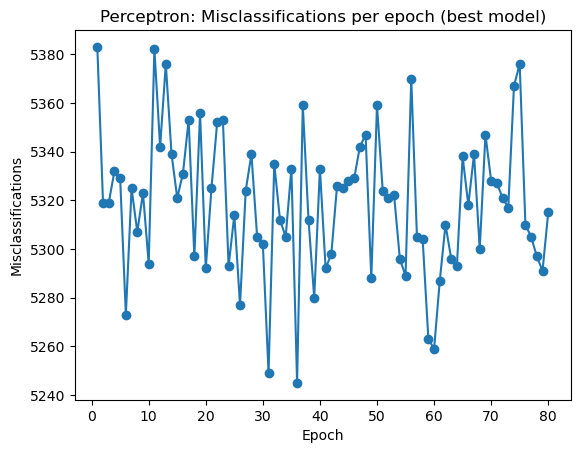

[AdalineSGD] Best train accuracy = 0.8383 (eta=0.0005, n_iter=80)


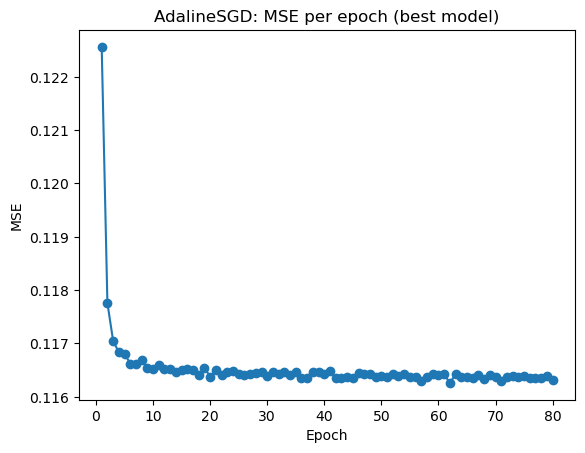

Saved: perceptron_valid_predictions.csv, adaline_sgd_valid_predictions.csv


In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

# labels to 0/1
y_bin = (
    pd.Series(y_train).astype(str).str.strip()
      .map({'>50K': 1, '<=50K': 0}).astype(int).values
)

# matrices as float64
Xtr = X_train_proc.to_numpy(dtype=np.float64, copy=False)
Xva = X_valid_proc.to_numpy(dtype=np.float64, copy=False)
N = len(y_bin)

# =========================
# Perceptron: grid search
# =========================
perc_grid = {'eta': [0.001, 0.01, 0.1], 'n_iter': [20, 40, 80]}
best_p, best_acc_p, best_hist_p, best_params_p = None, -1.0, None, None

for eta, n_iter in product(perc_grid['eta'], perc_grid['n_iter']):
    pp = Perceptron(eta=eta, n_iter=n_iter, random_state=1)
    pp.fit(Xtr, y_bin)
    acc = (pp.predict(Xtr) == y_bin).mean()
    if acc > best_acc_p:
        best_acc_p, best_p = acc, pp
        best_hist_p = list(pp.errors_)
        best_params_p = (eta, n_iter)

print(f"[Perceptron] Best train accuracy = {best_acc_p:.4f} "
      f"(eta={best_params_p[0]}, n_iter={best_params_p[1]})")

# (b) Plot misclassifications over epochs (Perceptron)
plt.figure()
plt.plot(range(1, len(best_hist_p) + 1), best_hist_p, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Perceptron: Misclassifications per epoch (best model)")
plt.show()

# =========================
# AdalineSGD: grid search
# =========================
ada_grid = {'eta': [0.0005, 0.001, 0.005], 'n_iter': [20, 40, 80]}
best_a, best_acc_a, best_mse_a, best_params_a = None, -1.0, None, None

for eta, n_iter in product(ada_grid['eta'], ada_grid['n_iter']):
    ada = AdalineSGD(eta=eta, n_iter=n_iter, shuffle=True, random_state=1)
    ada.fit(Xtr, y_bin)
    acc = (ada.predict(Xtr) == y_bin).mean()
    if acc > best_acc_a:
        best_acc_a, best_a = acc, ada
        # convert epoch cost (sum of 0.5*e^2 per sample) to MSE
        best_mse_a = [c / N * 2.0 for c in ada.cost_]
        best_params_a = (eta, n_iter)

print(f"[AdalineSGD] Best train accuracy = {best_acc_a:.4f} "
      f"(eta={best_params_a[0]}, n_iter={best_params_a[1]})")

# (b) Plot MSE over epochs (Adaline)
plt.figure()
plt.plot(range(1, len(best_mse_a) + 1), best_mse_a, marker='o')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("AdalineSGD: MSE per epoch (best model)")
plt.show()

# =========================
# (d) Predict on validation with best models
# =========================
valid_pred_perc = best_p.predict(Xva)
valid_pred_ada  = best_a.predict(Xva)

# Map back to original labels for saving
to_label = {0: "<=50K", 1: ">50K"}
perc_labels = pd.Series(valid_pred_perc, index=X_valid_proc.index, name="perceptron_pred").map(to_label)
ada_labels  = pd.Series(valid_pred_ada,  index=X_valid_proc.index, name="adaline_sgd_pred").map(to_label)

perc_labels.to_csv("perceptron_valid_predictions.csv", index=False)
ada_labels.to_csv("adaline_sgd_valid_predictions.csv", index=False)

print("Saved: perceptron_valid_predictions.csv, adaline_sgd_valid_predictions.csv")


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# y_bin is already 0/1 from your mapping
# X_train_proc and X_valid_proc are preprocessed DataFrames

# Logistic Regression model
logreg = LogisticRegression(max_iter=2000, solver="lbfgs", random_state=1)

# Train
logreg.fit(X_train_proc.values, y_bin)

# Evaluate on training data (or split off a test set if you want)
y_train_pred = logreg.predict(X_train_proc.values)
print("Training accuracy:", accuracy_score(y_bin, y_train_pred))
print(classification_report(y_bin, y_train_pred))

# Predict on validation set
y_valid_pred_lr = logreg.predict(X_valid_proc.values)

# Map predictions back to original labels
to_label = {0: "<=50K", 1: ">50K"}
lr_labels = pd.Series(y_valid_pred_lr, index=X_valid_proc.index, name="logreg_pred").map(to_label)

# Save to CSV
lr_labels.to_csv("logistic_regression_valid_predictions.csv", index=False)

print("Saved: logistic_regression_valid_predictions.csv")


Training accuracy: 0.851389742014742
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19778
           1       0.74      0.60      0.66      6270

    accuracy                           0.85     26048
   macro avg       0.81      0.76      0.78     26048
weighted avg       0.84      0.85      0.85     26048

Saved: logistic_regression_valid_predictions.csv


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ----------------------
# Linear SVM model
# ----------------------
svm_clf = SVC(kernel="linear", C=1.0, random_state=1)

# Train
svm_clf.fit(X_train_proc.values, y_bin)

# Evaluate on training data (or split off a test set if you want)
y_train_pred = svm_clf.predict(X_train_proc.values)
print("Training accuracy:", accuracy_score(y_bin, y_train_pred))
print(classification_report(y_bin, y_train_pred))

# ----------------------
# Predict on validation set
# ----------------------
y_valid_pred_svm = svm_clf.predict(X_valid_proc.values)

# Map predictions back to original labels
to_label = {0: "<=50K", 1: ">50K"}
svm_labels = pd.Series(y_valid_pred_svm, index=X_valid_proc.index, name="svm_pred").map(to_label)

# Save predictions
svm_labels.to_csv("svm_valid_predictions.csv", index=False)

print("Saved: svm_valid_predictions.csv")


Training accuracy: 0.8504683660933661
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     19778
           1       0.75      0.57      0.65      6270

    accuracy                           0.85     26048
   macro avg       0.81      0.75      0.78     26048
weighted avg       0.84      0.85      0.84     26048

Saved: svm_valid_predictions.csv


In [20]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# features and labels
Xtr = X_train_proc.values
ytr = y_bin

# parameter grid
param_grid = {"C": [0.01, 0.1, 1.0, 10.0, 100.0]}

# Logistic Regression GridSearchCV
start = time.time()
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=2000, solver="lbfgs"),
    param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_lr.fit(Xtr, ytr)
end = time.time()
print("Best Logistic Regression:", grid_lr.best_params_, "CV Acc:", grid_lr.best_score_)
print(f"Time taken for Logistic Regression: {end - start:.2f} seconds")

# SVM GridSearchCV
start = time.time()
grid_svm = GridSearchCV(
    SVC(kernel="linear"),
    param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_svm.fit(Xtr, ytr)
end = time.time()
print("Best SVM:", grid_svm.best_params_, "CV Acc:", grid_svm.best_score_)
print(f"Time taken for SVM: {end - start:.2f} seconds")


Best Logistic Regression: {'C': 1.0} CV Acc: 0.850007866939289
Time taken for Logistic Regression: 5.20 seconds


Exception ignored in: <function ResourceTracker.__del__ at 0x105bbdbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107005bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106f6dbc0>
Traceback (most recent call last

Best SVM: {'C': 1.0} CV Acc: 0.8487026845976382
Time taken for SVM: 938.58 seconds


In [21]:
# ===== 3(c) PREDICT & SAVE CSVs =====
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd

# Best models (C=1.0). We train on ALL processed training rows you prepared.
lr_best  = LogisticRegression(C=1.0, solver="lbfgs", max_iter=2000, random_state=42)
svm_best = SVC(kernel="linear", C=1.0, random_state=42)

# Fit on preprocessed training
lr_best.fit(X_train_proc.values, y_bin)
svm_best.fit(X_train_proc.values, y_bin)

# Predict on preprocessed validation
pred_lr  = lr_best.predict(X_valid_proc.values)
pred_svm = svm_best.predict(X_valid_proc.values)

# Map back to labels and save (rename Group_# as needed)
to_label = {0: "<=50K", 1: ">50K"}
pd.Series(pred_lr,  name="prediction").map(to_label)\
  .to_csv("Group_#_LogisticRegression_PredictedOutputs.csv", index=False)
pd.Series(pred_svm, name="prediction").map(to_label)\
  .to_csv("Group_#_SVM_PredictedOutputs.csv", index=False)

print("Saved: Group_#_LogisticRegression_PredictedOutputs.csv")
print("Saved: Group_#_SVM_PredictedOutputs.csv")


Saved: Group_#_LogisticRegression_PredictedOutputs.csv
Saved: Group_#_SVM_PredictedOutputs.csv


Using features for boundary plot: age, hours-per-week


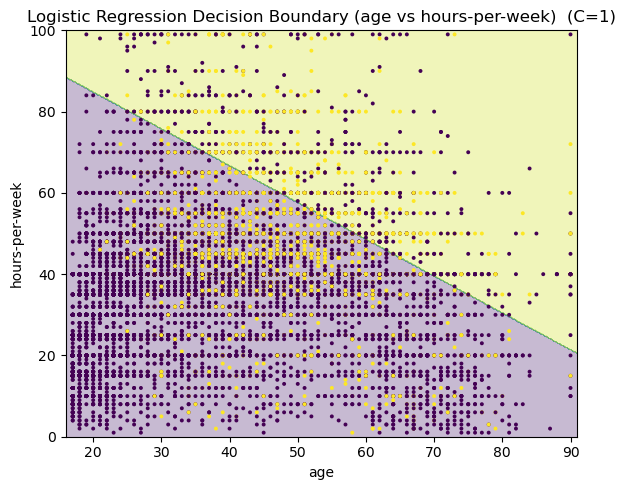

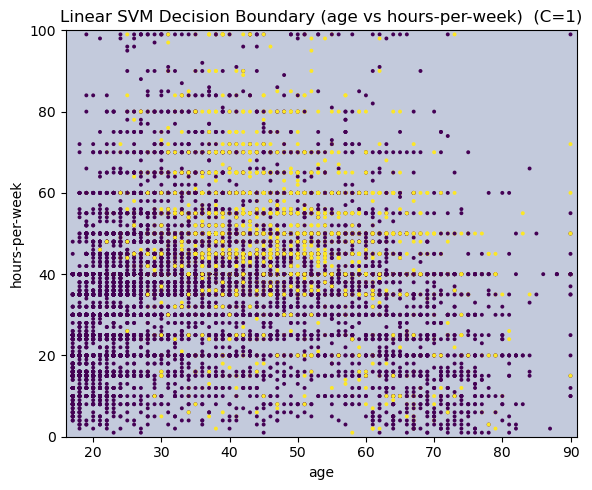

In [22]:
# ===== 3(d) 2-FEATURE DECISION BOUNDARIES =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Pick two numeric features
candidates = ["age", "hours-per-week", "hours_per_week", "education-num", "capital-gain", "capital-loss"]
chosen = [c for c in candidates if c in X_train.columns]
if len(chosen) < 2:
    # fall back to first two in your numeric list
    chosen = num_cols[:2]
f1, f2 = chosen[:2]
print(f"Using features for boundary plot: {f1}, {f2}")

# Build 2D-only preprocess (median + standardize) to match your main pipeline
prep2d = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])

# Prepare raw 2D data (use the original, unencoded columns)
X2 = X_train[[f1, f2]].copy()
y2 = y_bin  # already 0/1

# Fit 2D models
lr2d  = Pipeline([("prep", prep2d), ("clf", LogisticRegression(C=1.0, max_iter=2000, random_state=42))])
svm2d = Pipeline([("prep", prep2d), ("clf", SVC(kernel="linear", C=1.0, random_state=42))])

lr2d.fit(X2, y2)
svm2d.fit(X2, y2)

# Create meshgrid over the 2D feature space
x_min, x_max = X2[f1].min() - 1, X2[f1].max() + 1
y_min, y_max = X2[f2].min() - 1, X2[f2].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[f1, f2])

# Predict over grid for both models
Z_lr  = lr2d.predict(grid).reshape(xx.shape)
Z_svm = svm2d.predict(grid).reshape(xx.shape)

# Plot Logistic Regression boundary
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z_lr, alpha=0.30)
plt.scatter(X2[f1], X2[f2], c=y2, s=8, edgecolor="none")
plt.xlabel(f1); plt.ylabel(f2)
plt.title(f"Logistic Regression Decision Boundary ({f1} vs {f2})  (C=1)")
plt.tight_layout()
plt.show()

# Plot Linear SVM boundary
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z_svm, alpha=0.30)
plt.scatter(X2[f1], X2[f2], c=y2, s=8, edgecolor="none")
plt.xlabel(f1); plt.ylabel(f2)
plt.title(f"Linear SVM Decision Boundary ({f1} vs {f2})  (C=1)")
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Features/labels from your preprocessed data
Xtr = X_train_proc.values
ytr = y_bin

C_values = [0.01, 1.0, 100.0]

results = []

for C in C_values:
    # Logistic Regression
    lr = LogisticRegression(C=C, solver="lbfgs", max_iter=2000, random_state=42)
    lr.fit(Xtr, ytr)
    y_pred_lr = lr.predict(Xtr)
    acc_lr = accuracy_score(ytr, y_pred_lr)
    results.append(("LogisticRegression", C, acc_lr))
    
    # Linear SVM
    svm = LinearSVC(C=C, max_iter=5000, random_state=42)
    svm.fit(Xtr, ytr)
    y_pred_svm = svm.predict(Xtr)
    acc_svm = accuracy_score(ytr, y_pred_svm)
    results.append(("LinearSVC", C, acc_svm))

# Show results
df_results = pd.DataFrame(results, columns=["Model", "C", "Train Accuracy"])
print(df_results)


                Model       C  Train Accuracy
0  LogisticRegression    0.01        0.848011
1           LinearSVC    0.01        0.851159
2  LogisticRegression    1.00        0.851390
3           LinearSVC    1.00        0.851889
4  LogisticRegression  100.00        0.851620
5           LinearSVC  100.00        0.851697


In [29]:

import pandas as pd

GROUP = "Group_7"  # <-- change to your group number
to_label = {0: "<=50K", 1: ">50K"}

Xva = X_valid_proc.values

# Perceptron
pred_perc = best_p.predict(Xva)
pd.Series(pred_perc, name="prediction").map(to_label) \
  .to_csv(f"{GROUP}_Perceptron_PredictedOutputs.csv", index=False)

# Adaline (your AdalineSGD)
pred_ada = best_a.predict(Xva)
pd.Series(pred_ada, name="prediction").map(to_label) \
  .to_csv(f"{GROUP}_Adaline_PredictedOutputs.csv", index=False)

print("Saved:",
      f"{GROUP}_Perceptron_PredictedOutputs.csv and",
      f"{GROUP}_Adaline_PredictedOutputs.csv")


Saved: Group_7_Perceptron_PredictedOutputs.csv and Group_7_Adaline_PredictedOutputs.csv
